In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [297]:
EOS_FAM = pd.read_csv('EOS.csv', delimiter=';')
KOR_FAM = pd.read_csv('KOR.csv', delimiter=';')
VES_FAM = pd.read_csv('VES.csv', delimiter=';')

In [298]:
#Limpiando data incompleta
EOS_FAM.replace([np.inf, -np.inf], np.nan)
CEOS=EOS_FAM.dropna(subset=['DIA.', 'AMAX', 'PERIOD'])
#new_EOS_FAM = EOS_FAM.drop('DIA',axis ='columns')
freq3=(24)/(np.array(CEOS['PERIOD']))

In [299]:
#Limpiando data incompleta
KOR_FAM.replace([np.inf, -np.inf], np.nan)
CKOR=KOR_FAM.dropna(subset=['DIA.', 'AMAX', 'PERIOD'])
#new_EOS_FAM = EOS_FAM.drop('DIA',axis ='columns')
freq3=(24)/(np.array(CKOR['PERIOD']))

In [300]:
#Limpiando data incompleta
VES_FAM.replace([np.inf, -np.inf], np.nan)
CVES=VES_FAM.dropna(subset=['DIA.', 'AMAX', 'PERIOD'])
#new_EOS_FAM = EOS_FAM.drop('DIA',axis ='columns')
freq3=(24)/(np.array(CEOS['PERIOD']))

In [301]:
FEOS=CEOS[['FAM','NAME','DIA.','AMAX','PERIOD']]
FEOS.describe()

,DIA.,AMAX,PERIOD
count,414.000000,414.000000,414.000000
mean,14.220556,0.435314,22.816185
std,11.636805,0.243009,75.290473
min,1.560000,0.040000,1.330000
25%,5.732500,0.250000,5.278250
50%,10.730000,0.400000,7.408000
75%,19.895000,0.577500,12.088750
max,103.870000,1.800000,975.095000


In [302]:
FVES=CVES[['FAM','NAME','DIA.','AMAX','PERIOD']]
FVES.describe()

,DIA.,AMAX,PERIOD
count,519.000000,519.000000,519.000000
mean,5.952755,0.432967,20.630759
std,23.665486,0.260617,80.452959
min,0.560000,0.030000,0.570000
25%,1.735000,0.210000,4.290000
50%,2.610000,0.400000,6.252000
75%,4.505000,0.610000,10.667500
max,468.300000,1.420000,1234.171000


In [303]:
FKOR=CKOR[['FAM','NAME','DIA.','AMAX','PERIOD']]
FKOR.describe()

,DIA.,AMAX,PERIOD
count,305.000000,305.000000,305.000000
mean,7.031639,0.452656,14.337517
std,7.257513,0.256208,33.732669
min,0.890000,0.050000,1.000000
25%,2.530000,0.240000,3.822000
50%,4.440000,0.420000,6.034000
75%,8.580000,0.600000,10.697000
max,44.000000,1.460000,321.546000


In [375]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(FKE[['DIA.','AMAX','PERIOD']]))
print(z)


[[2.17419873 0.05098892 0.08162249]
 [3.09271564 0.21195942 0.10035727]
 [2.781833   0.45341516 0.08379298]
 ...
 [0.88469809 0.39167995 0.25557201]
 [0.90542359 1.55871607 0.24576399]
 [0.78672295 1.13753978 0.29194817]]


In [376]:
threshold = 3
print(np.where(z > 3))

(array([  1,  36, 164, 165, 173, 183, 284, 305, 309, 313, 314, 318, 321,
       323, 344, 501, 518, 529, 582, 631, 638, 662, 668, 671, 681, 696,
       709], dtype=int64), array([0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 1], dtype=int64))


In [377]:
print(z[1][1])

0.21195941530002085


In [379]:
Q1 = FKE.quantile(0.25)
Q3 = FKE.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

DIA.      12.340
AMAX       0.340
PERIOD     7.213
dtype: float64


In [380]:
print(FKE < (Q1 - 1.5 * IQR)) |(FKE > (Q3 + 1.5 * IQR))

      AMAX   DIA.    FAM   NAME  PERIOD
0    False  False  False  False   False
1    False  False  False  False   False
2    False  False  False  False   False
3    False  False  False  False   False
4    False  False  False  False   False
5    False  False  False  False   False
6    False  False  False  False   False
7    False  False  False  False   False
8    False  False  False  False   False
9    False  False  False  False   False
10   False  False  False  False   False
11   False  False  False  False   False
12   False  False  False  False   False
13   False  False  False  False   False
14   False  False  False  False   False
15   False  False  False  False   False
16   False  False  False  False   False
17   False  False  False  False   False
18   False  False  False  False   False
19   False  False  False  False   False
20   False  False  False  False   False
21   False  False  False  False   False
22   False  False  False  False   False
23   False  False  False  False   False


TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [387]:
FKE = FKE[(z < 3).all(axis=1)]
FKE.shape


ValueError: Item wrong length 719 instead of 692.

In [304]:
FKE=FKOR.append(FEOS, sort=False)
FKE.head()

,FAM,NAME,DIA.,AMAX,PERIOD
0,KOR,Koronis,34.25,0.43,14.218
1,KOR,Urda,44.00,0.39,13.070
2,KOR,Lacrimosa,40.70,0.33,14.085
3,KOR,Ida,27.99,0.86,4.634
4,KOR,Dresda,23.16,0.55,16.809


Text(0, 0.5, 'Amplitud Máxima')

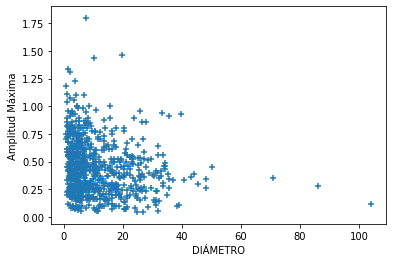

In [338]:
plt.scatter(FKE['DIA.'], FKE['AMAX'],marker='+');
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Amplitud Máxima', fontdict=None, labelpad=None)

In [305]:
y= FKE.iloc[:,0].values
X=FKE.iloc[:,2:5].values
X

array([[34.25 ,  0.43 , 14.218],
       [44.   ,  0.39 , 13.07 ],
       [40.7  ,  0.33 , 14.085],
       ...,
       [ 1.78 ,  0.54 ,  3.559],
       [ 1.56 ,  0.83 ,  4.16 ],
       [ 2.82 ,  0.16 ,  1.33 ]])

In [368]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [317]:
len(X_train) # 80% para entrenamiento y 20 % para probar el modelo

575

In [369]:
len(X_test)

144

In [318]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [330]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=23) #58 N es el óptimo!! :D
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [336]:
y_pred = classifier.predict(X_test)


In [332]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[59 16]
 [26 43]]
              precision    recall  f1-score   support

         EOS       0.69      0.79      0.74        75
         KOR       0.73      0.62      0.67        69

    accuracy                           0.71       144
   macro avg       0.71      0.70      0.70       144
weighted avg       0.71      0.71      0.71       144



In [333]:
error = []

# Calculating error for K values between 1 and 575
for i in range(20, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Mean Error')

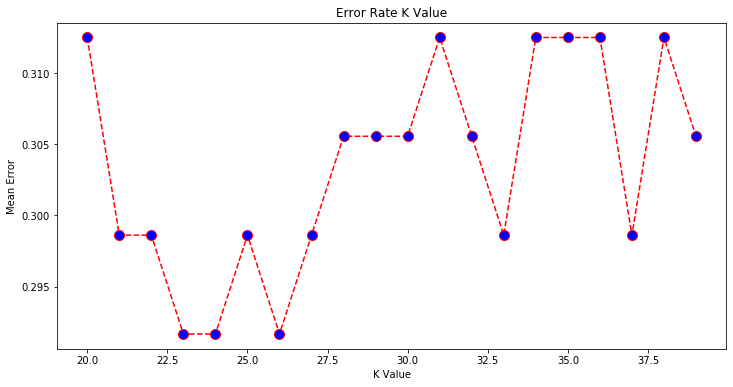

In [334]:
plt.figure(figsize=(12, 6))
plt.plot(range(20, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')